## Read in the appropriate packages 

In [1]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime 
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series 


## White Noise (no pattern)

White noise is an important concept in time series forecasting. It is important for two main reasons:
1. Predictability: If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.
2. Model Diagnostics: The series of errors from a time series forecast model should ideally be white noise, because it means you have captured all the patterns/trends in your model

Model Diagnostics is an important area of time series forecasting.

Time series data are expected to contain some white noise component on top of the signal generated by the underlying process.

y(t) = signal(t) + noise(t)

Once predictions have been made by a time series forecast model, they can be collected and analyzed. The series of forecast errors should ideally be white noise.

When forecast errors are white noise, it means that all of the signal information in the time series has been harnessed by the model in order to make predictions. All that is left is the random fluctuations that cannot be modeled.

A sign that model predictions are not white noise is an indication that further improvements to the forecast model may be possible.

How to know if a time series is white noise or not? A time series is probably NOT white noise if one or more of the following conditions are true:

1. Is the mean/level non-zero?
2. Does the mean/level change over time?
3. Does the variance change over time?
4. Do values correlate with lag values?

Some tools that you can use to check if your time series is white noise are:

1. Create a line plot. Check for gross features like a changing mean, variance, or obvious relationship between lagged variables.
2. Calculate summary statistics. Check the mean and variance.
3. Create an autocorrelation plot. Check for gross correlation between lagged variables.

Let us create a Gaussian white noise series and perform some checks.

It is helpful to create and review a white noise time series in practice. It will provide the frame of reference and example plots and statistical tests to use and compare on your own time series projects to check if they are white noise.

Source: https://machinelearningmastery.com/white-noise-time-series-python/

In [2]:
# First, we can create a list of 1,000 random Gaussian variables using the gauss() function from the random module.
# We will draw variables from a Gaussian distribution with a mean (mu) of 0.0 and a standard deviation (sigma) of 1.0.
#Once created, we can wrap the list in a Pandas Series for convenience.

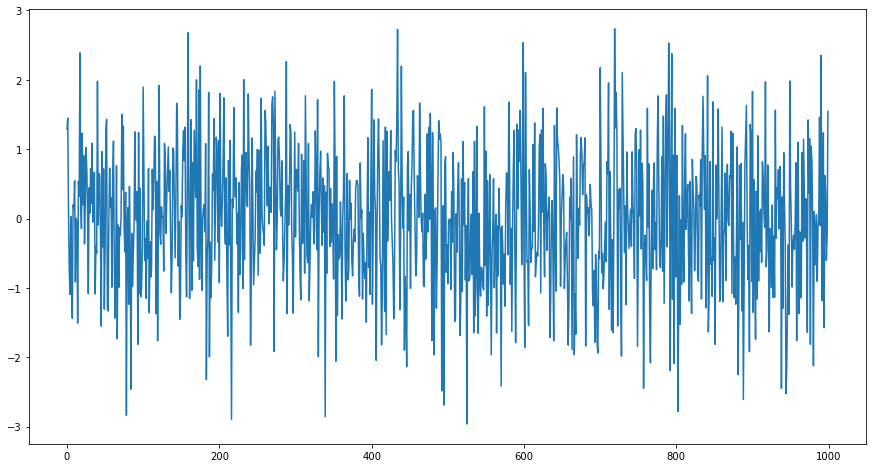

In [3]:
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)

# line plot 
plt.figure(figsize=(15,8))
series.plot()
plt.show()

In [4]:
# Next, we can calculate and print some summary statistics, including the mean and standard deviation of the series.

# summary stats
series.describe()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

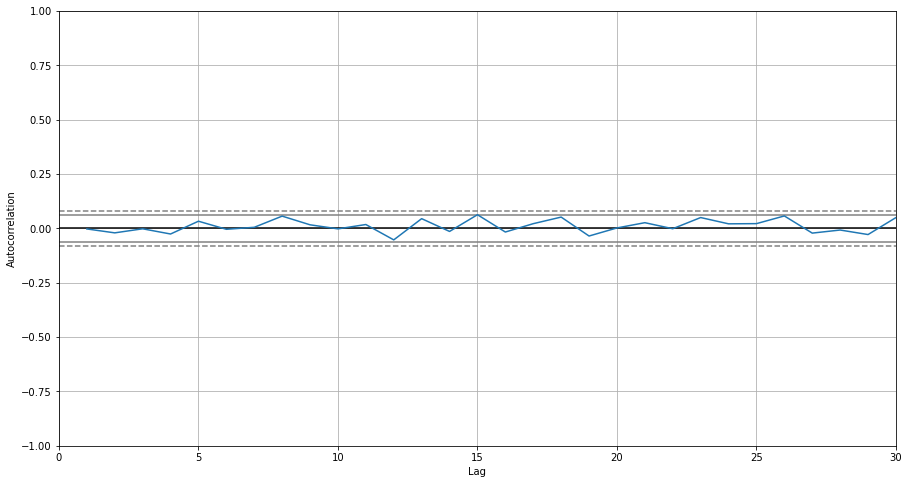

In [4]:
# autocorrelation plot - see slides

plt.figure(figsize=(15,8))
autocorrelation_plot(series).set_xlim([0, 30]) #print only 30 lags
plt.show()

In summary:

1. White noise time series is defined by a zero mean, constant variance, and zero correlation.
2. If your time series is white noise, it cannot be predicted, and if your forecast residuals are not white noise, you may be able to improve your model.
3. Descriptive statistics and plots such as autocorrelation, line plots, and residual plots can be used on your time series to check if it is white noise.

## Economic Factors Overview

In [6]:
inflation = pd.read_csv('US Inflation Rates from 2019 to 2022.csv', parse_dates=True)

In [8]:
inflation['Year'] = pd.to_datetime(inflation['Year'].astype(str), format ='%Y')

In [13]:
inflation

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,2022-01-01,7.48%,7.87%,8.54%,8.26%,8.58%,9.06%,8.53%,8.26%,8.20%,7.75%,NaN,NaN,NaN
1,2021-01-01,1.40%,1.68%,2.62%,4.16%,4.99%,5.39%,5.37%,5.25%,5.39%,6.22%,6.81%,7.04%,4.70%
2,2020-01-01,2.49%,2.34%,1.54%,0.33%,0.12%,0.65%,0.99%,1.31%,1.37%,1.18%,1.18%,1.36%,1.23%
3,2019-01-01,1.55%,1.52%,1.86%,2.00%,1.79%,1.65%,1.81%,1.75%,1.71%,1.76%,2.05%,2.29%,1.81%


## 1. Download stock data - single and multiple and get it into the right format

A way of getting the historical stock data is to use the pandas_datareader library. 
It uses Yahoo’s Finance API to load in the data. 

### First, download SINGLE stock using pandas_datareader

In [2]:
# Downloading SINGLE stock using pandas_datareader

stock_ticker = 'MRNA'   #Moderna

stock_start_date = datetime.date(2013,12,29)
stock_end_date = datetime.date.today()

In [3]:
# Getting the data
stock_df = pdr.get_data_yahoo(stock_ticker,start=stock_start_date,end=stock_end_date)

In [4]:
stock_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-07,22.750000,18.510000,22.000000,18.600000,12995600,18.600000
2018-12-10,19.438999,18.000000,18.900000,18.799999,4233300,18.799999
2018-12-11,20.660000,17.990000,20.549999,18.010000,3435300,18.010000
2018-12-12,19.480000,18.020000,18.549999,18.680000,2590700,18.680000
2018-12-13,19.290001,18.680000,19.250000,18.760000,1608600,18.760000
...,...,...,...,...,...,...
2022-11-07,165.490005,155.809998,158.460007,164.039993,4858500,164.039993
2022-11-08,167.490005,159.059998,162.460007,164.610001,3389200,164.610001
2022-11-09,169.830002,162.350006,162.500000,163.210007,3813800,163.210007


In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 991 entries, 2018-12-07 to 2022-11-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       991 non-null    float64
 1   Low        991 non-null    float64
 2   Open       991 non-null    float64
 3   Close      991 non-null    float64
 4   Volume     991 non-null    int64  
 5   Adj Close  991 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 54.2 KB


In [6]:
stock_df.index

DatetimeIndex(['2018-12-07', '2018-12-10', '2018-12-11', '2018-12-12',
               '2018-12-13', '2018-12-14', '2018-12-17', '2018-12-18',
               '2018-12-19', '2018-12-20',
               ...
               '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03',
               '2022-11-04', '2022-11-07', '2022-11-08', '2022-11-09',
               '2022-11-10', '2022-11-11'],
              dtype='datetime64[ns]', name='Date', length=991, freq=None)

In [7]:
# delete 2018 values
stock_df=stock_df[(stock_df.index.year!=2018)]
stock_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,15.450000,14.510000,14.930000,15.330000,2318100,15.330000
2019-01-03,16.080000,15.200000,15.490000,15.500000,1588900,15.500000
2019-01-04,17.500000,15.894000,16.000000,16.959999,1651800,16.959999
2019-01-07,17.940001,16.180000,17.540001,16.270000,1585400,16.270000
2019-01-08,17.468000,16.049999,17.350000,16.950001,1892700,16.950001
...,...,...,...,...,...,...
2022-11-07,165.490005,155.809998,158.460007,164.039993,4858500,164.039993
2022-11-08,167.490005,159.059998,162.460007,164.610001,3389200,164.610001
2022-11-09,169.830002,162.350006,162.500000,163.210007,3813800,163.210007


### Next, download multiple stock data using pandas_datareader

In [8]:
# Downloading multiple stock using pandas_datareader

stock_ticker_multiple = ['MRNA', 'SPY']

#start date and end date are same as before

In [9]:
# Getting the data
stock_start_date1 = datetime.date(2019,1,1)
stock_end_date1 = datetime.date.today()
stock_df_multiple = pdr.get_data_yahoo(stock_ticker_multiple,start=stock_start_date1,end=stock_end_date1)

In [10]:
stock_df_multiple

Attributes   Adj Close                   Close                    High  \
Symbols           MRNA         SPY        MRNA         SPY        MRNA   
Date                                                                     
2019-01-02   15.330000  235.136459   15.330000  250.179993   15.450000   
2019-01-03   15.500000  229.525467   15.500000  244.210007   16.080000   
2019-01-04   16.959999  237.213531   16.959999  252.389999   17.500000   
2019-01-07   16.270000  239.083878   16.270000  254.380005   17.940001   
2019-01-08   16.950001  241.330139   16.950001  256.769989   17.468000   
...                ...         ...         ...         ...         ...   
2022-11-07  164.039993  379.950012  164.039993  379.950012  165.490005   
2022-11-08  164.610001  382.000000  164.610001  382.000000  167.490005   
2022-11-09  163.210007  374.130005  163.210007  374.130005  169.830002   
2022-11-10  168.559998  394.690002  168.559998  394.690002  169.279999   
2022-11-11  171.199997  398.510010  171.199997  398.510010  172.134995   

Attributes                     Low                    Open              \
Symbols            SPY        MRNA         SPY        MRNA         SPY   
Date                                                                     
2019-01-02  251.210007   14.510000  245.949997   14.930000  245.979996   
2019-01-03  248.570007   15.200000  243.669998   15.490000  248.229996   
2019-01-04  253.110001   15.894000  247.169998   16.000000  247.589996   
2019-01-07  255.949997   16.180000  251.690002   17.540001  252.690002   
2019-01-08  257.309998   16.049999  254.000000   17.350000  256.820007   
...                ...         ...         ...         ...         ...   
2022-11-07  380.570007  155.809998  375.529999  158.460007  377.709991   
2022-11-08  385.119995  159.059998  377.720001  162.460007  381.109985   
2022-11-09  381.140015  162.350006  373.609985  162.500000  379.929993   
2022-11-10  395.040009  161.710007  385.640015  164.524994  388.049988   
2022-11-11  399.350006  162.740005  393.609985  168.309998  395.589996   

Attributes     Volume               
Symbols          MRNA          SPY  
Date                                
2019-01-02  2318100.0  126925200.0  
2019-01-03  1588900.0  144140700.0  
2019-01-04  1651800.0  142628800.0  
2019-01-07  1585400.0  103139100.0  
2019-01-08  1892700.0  102512600.0  
...               ...          ...  
2022-11-07  4858500.0   68286900.0  
2022-11-08  3389200.0   84641100.0  
2022-11-09  3813800.0   78495500.0  
2022-11-10  4886100.0  141455800.0  
2022-11-11  3609500.0   93758600.0  

[975 rows x 12 columns]

In [11]:
#check column names
stock_df_multiple.columns

MultiIndex([('Adj Close', 'MRNA'),
            ('Adj Close',  'SPY'),
            (    'Close', 'MRNA'),
            (    'Close',  'SPY'),
            (     'High', 'MRNA'),
            (     'High',  'SPY'),
            (      'Low', 'MRNA'),
            (      'Low',  'SPY'),
            (     'Open', 'MRNA'),
            (     'Open',  'SPY'),
            (   'Volume', 'MRNA'),
            (   'Volume',  'SPY')],
           names=['Attributes', 'Symbols'])

In [12]:
#handle multiple indexes
stock_df_multiple.columns = stock_df_multiple.columns.map('_'.join).str.replace(' ','_')

In [13]:
stock_df_multiple

,Adj_Close_MRNA,Adj_Close_SPY,Close_MRNA,Close_SPY,High_MRNA,High_SPY,Low_MRNA,Low_SPY,Open_MRNA,Open_SPY,Volume_MRNA,Volume_SPY
Date,,,,,,,,,,,,
2019-01-02,15.330000,235.136459,15.330000,250.179993,15.450000,251.210007,14.510000,245.949997,14.930000,245.979996,2318100.0,126925200.0
2019-01-03,15.500000,229.525467,15.500000,244.210007,16.080000,248.570007,15.200000,243.669998,15.490000,248.229996,1588900.0,144140700.0
2019-01-04,16.959999,237.213531,16.959999,252.389999,17.500000,253.110001,15.894000,247.169998,16.000000,247.589996,1651800.0,142628800.0
2019-01-07,16.270000,239.083878,16.270000,254.380005,17.940001,255.949997,16.180000,251.690002,17.540001,252.690002,1585400.0,103139100.0
2019-01-08,16.950001,241.330139,16.950001,256.769989,17.468000,257.309998,16.049999,254.000000,17.350000,256.820007,1892700.0,102512600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-07,164.039993,379.950012,164.039993,379.950012,165.490005,380.570007,155.809998,375.529999,158.460007,377.709991,4858500.0,68286900.0
2022-11-08,164.610001,382.000000,164.610001,382.000000,167.490005,385.119995,159.059998,377.720001,162.460007,381.109985,3389200.0,84641100.0
2022-11-09,163.210007,374.130005,163.210007,374.130005,169.830002,381.140015,162.350006,373.609985,162.500000,379.929993,3813800.0,78495500.0


In [14]:
#select only the columns that have info about the volumes traded for both the stock tickers
stock_df_multiple = stock_df_multiple[['Close_MRNA', 'Close_SPY']]

In [15]:
stock_df_multiple

,Close_MRNA,Close_SPY
Date,,
2019-01-02,15.330000,250.179993
2019-01-03,15.500000,244.210007
2019-01-04,16.959999,252.389999
2019-01-07,16.270000,254.380005
2019-01-08,16.950001,256.769989
...,...,...
2022-11-07,164.039993,379.950012
2022-11-08,164.610001,382.000000
2022-11-09,163.210007,374.130005


## An alternative would be to download both the stock tickers independently and then join them - example to showcase data engineering

In [16]:
# Getting the data
stock_df_mrna = pdr.get_data_yahoo('MRNA',start=stock_start_date1,end=stock_end_date1)
stock_df_spy = pdr.get_data_yahoo('SPY',start=stock_start_date1,end=stock_end_date1)

In [17]:
stock_df_spy

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,251.210007,245.949997,245.979996,250.179993,126925200.0,235.136429
2019-01-03,248.570007,243.669998,248.229996,244.210007,144140700.0,229.525436
2019-01-04,253.110001,247.169998,247.589996,252.389999,142628800.0,237.213547
2019-01-07,255.949997,251.690002,252.690002,254.380005,103139100.0,239.083878
2019-01-08,257.309998,254.000000,256.820007,256.769989,102512600.0,241.330170
...,...,...,...,...,...,...
2022-11-07,380.570007,375.529999,377.709991,379.950012,68286900.0,379.950012
2022-11-08,385.119995,377.720001,381.109985,382.000000,84641100.0,382.000000
2022-11-09,381.140015,373.609985,379.929993,374.130005,78495500.0,374.130005


In [18]:
stock_df_mrna

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,15.450000,14.510000,14.930000,15.330000,2318100,15.330000
2019-01-03,16.080000,15.200000,15.490000,15.500000,1588900,15.500000
2019-01-04,17.500000,15.894000,16.000000,16.959999,1651800,16.959999
2019-01-07,17.940001,16.180000,17.540001,16.270000,1585400,16.270000
2019-01-08,17.468000,16.049999,17.350000,16.950001,1892700,16.950001
...,...,...,...,...,...,...
2022-11-07,165.490005,155.809998,158.460007,164.039993,4858500,164.039993
2022-11-08,167.490005,159.059998,162.460007,164.610001,3389200,164.610001
2022-11-09,169.830002,162.350006,162.500000,163.210007,3813800,163.210007


In [23]:
# Joins refresher in the slides
# we will use an inner join today

In [19]:
#join the datasets using the inner join. Use the index to join
joined_data = pd.merge(stock_df_mrna,stock_df_spy,how='inner',left_on=stock_df_mrna.index,right_on=stock_df_spy.index)


In [25]:
joined_data

,key_0,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y
0,2019-01-02,15.450000,14.510000,14.930000,15.330000,2318100,15.330000,251.210007,245.949997,245.979996,250.179993,126925200.0,235.136429
1,2019-01-03,16.080000,15.200000,15.490000,15.500000,1588900,15.500000,248.570007,243.669998,248.229996,244.210007,144140700.0,229.525421
2,2019-01-04,17.500000,15.894000,16.000000,16.959999,1651800,16.959999,253.110001,247.169998,247.589996,252.389999,142628800.0,237.213562
3,2019-01-07,17.940001,16.180000,17.540001,16.270000,1585400,16.270000,255.949997,251.690002,252.690002,254.380005,103139100.0,239.083893
4,2019-01-08,17.468000,16.049999,17.350000,16.950001,1892700,16.950001,257.309998,254.000000,256.820007,256.769989,102512600.0,241.330185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2022-11-07,165.490005,155.809998,158.460007,164.039993,4858500,164.039993,380.570007,375.529999,377.709991,379.950012,68286900.0,379.950012
971,2022-11-08,167.490005,159.059998,162.460007,164.610001,3389200,164.610001,385.119995,377.720001,381.109985,382.000000,84641100.0,382.000000
972,2022-11-09,169.830002,162.350006,162.500000,163.210007,3813800,163.210007,381.140015,373.609985,379.929993,374.130005,78495500.0,374.130005
973,2022-11-10,169.279999,161.710007,164.524994,168.559998,4883700,168.559998,395.040009,385.640015,388.049988,394.690002,141195500.0,394.690002


In [20]:
stock_df_multiple_joined_data = joined_data[['key_0', 'Close_x', 'Close_y']]
stock_df_multiple_joined_data

,key_0,Close_x,Close_y
0,2019-01-02,15.330000,250.179993
1,2019-01-03,15.500000,244.210007
2,2019-01-04,16.959999,252.389999
3,2019-01-07,16.270000,254.380005
4,2019-01-08,16.950001,256.769989
...,...,...,...
970,2022-11-07,164.039993,379.950012
971,2022-11-08,164.610001,382.000000
972,2022-11-09,163.210007,374.130005
973,2022-11-10,168.559998,394.690002


In [21]:
stock_df_multiple_joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 974
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key_0    975 non-null    datetime64[ns]
 1   Close_x  975 non-null    float64       
 2   Close_y  975 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 30.5 KB


In [22]:
#rename the columns and index
# create a dictionary
# key = old name
# value = new name
dict = {'key_0': 'Date',
        'Close_x': 'Close_MRNA',
        'Close_y': 'Close_SPY'}

# call rename () method
stock_df_multiple_joined_data.rename(columns=dict,
                                     inplace=True)


C:\Users\frede\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [23]:
stock_df_multiple_joined_data

,Date,Close_MRNA,Close_SPY
0,2019-01-02,15.330000,250.179993
1,2019-01-03,15.500000,244.210007
2,2019-01-04,16.959999,252.389999
3,2019-01-07,16.270000,254.380005
4,2019-01-08,16.950001,256.769989
...,...,...,...
970,2022-11-07,164.039993,379.950012
971,2022-11-08,164.610001,382.000000
972,2022-11-09,163.210007,374.130005
973,2022-11-10,168.559998,394.690002


In [24]:
stock_df_multiple_joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 974
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        975 non-null    datetime64[ns]
 1   Close_MRNA  975 non-null    float64       
 2   Close_SPY   975 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 30.5 KB


In [25]:
#set index as the date
stock_df_multiple_joined_data = stock_df_multiple_joined_data.set_index('Date')
stock_df_multiple_joined_data

,Close_MRNA,Close_SPY
Date,,
2019-01-02,15.330000,250.179993
2019-01-03,15.500000,244.210007
2019-01-04,16.959999,252.389999
2019-01-07,16.270000,254.380005
2019-01-08,16.950001,256.769989
...,...,...
2022-11-07,164.039993,379.950012
2022-11-08,164.610001,382.000000
2022-11-09,163.210007,374.130005


In [26]:
stock_df_multiple

,Close_MRNA,Close_SPY
Date,,
2019-01-02,15.330000,250.179993
2019-01-03,15.500000,244.210007
2019-01-04,16.959999,252.389999
2019-01-07,16.270000,254.380005
2019-01-08,16.950001,256.769989
...,...,...
2022-11-07,164.039993,379.950012
2022-11-08,164.610001,382.000000
2022-11-09,163.210007,374.130005


## 2. Exploratory Data Analysis (EDA)


In [27]:
#delete year 2018
stock_df_multiple = stock_df_multiple[(stock_df_multiple.index.year!=2018)]
stock_df_multiple.sort_values(by = ['Close_MRNA'], ascending = False)

,Close_MRNA,Close_SPY
Date,,
2021-08-09,484.470001,442.130005
2021-08-10,456.760010,442.679993
2021-09-09,455.920013,448.980011
2021-09-23,454.600006,443.179993
2021-09-10,449.380005,445.440002
...,...,...
2019-08-14,12.740000,283.899994
2019-08-02,12.730000,292.619995
2019-08-15,12.670000,284.649994


In [28]:
# ask people to interpret and answer the skew 

In [29]:
# 1. Descriptive Statistics
stock_df_multiple.describe()

,Close_MRNA,Close_SPY
count,975.000000,975.000000
mean,118.981236,360.705723
std,104.701750,63.936196
min,12.260000,222.949997
25%,21.825000,299.294998
50%,114.389999,362.790009
75%,163.079994,418.220001
max,484.470001,477.709991


<AxesSubplot:>

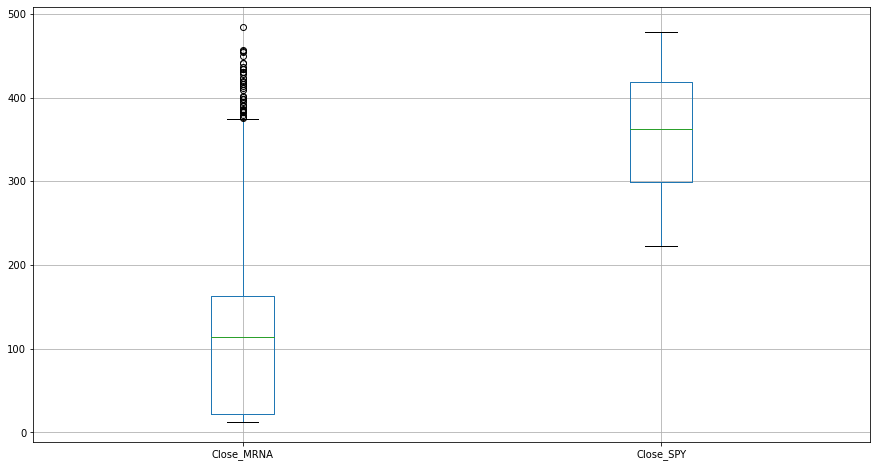

In [30]:
plt.figure(figsize=(15,8))
stock_df_multiple.boxplot()

###  For MRNA, it is left skewed; and for SPY, although it is left skewed, the degree is minimum compared to MRNA.

In [31]:
# 2. Check for missing values
stock_df_multiple.isnull().sum()

Close_MRNA    0
Close_SPY     0
dtype: int64

In [32]:
# 3. Find the indexes that are missing
pd.date_range(start = '2019-01-01', end = stock_end_date1).difference(stock_df_multiple.index)

DatetimeIndex(['2019-01-01', '2019-01-05', '2019-01-06', '2019-01-12',
               '2019-01-13', '2019-01-19', '2019-01-20', '2019-01-21',
               '2019-01-26', '2019-01-27',
               ...
               '2022-10-09', '2022-10-15', '2022-10-16', '2022-10-22',
               '2022-10-23', '2022-10-29', '2022-10-30', '2022-11-05',
               '2022-11-06', '2022-11-12'],
              dtype='datetime64[ns]', length=437, freq=None)

### There are 436 index missing.

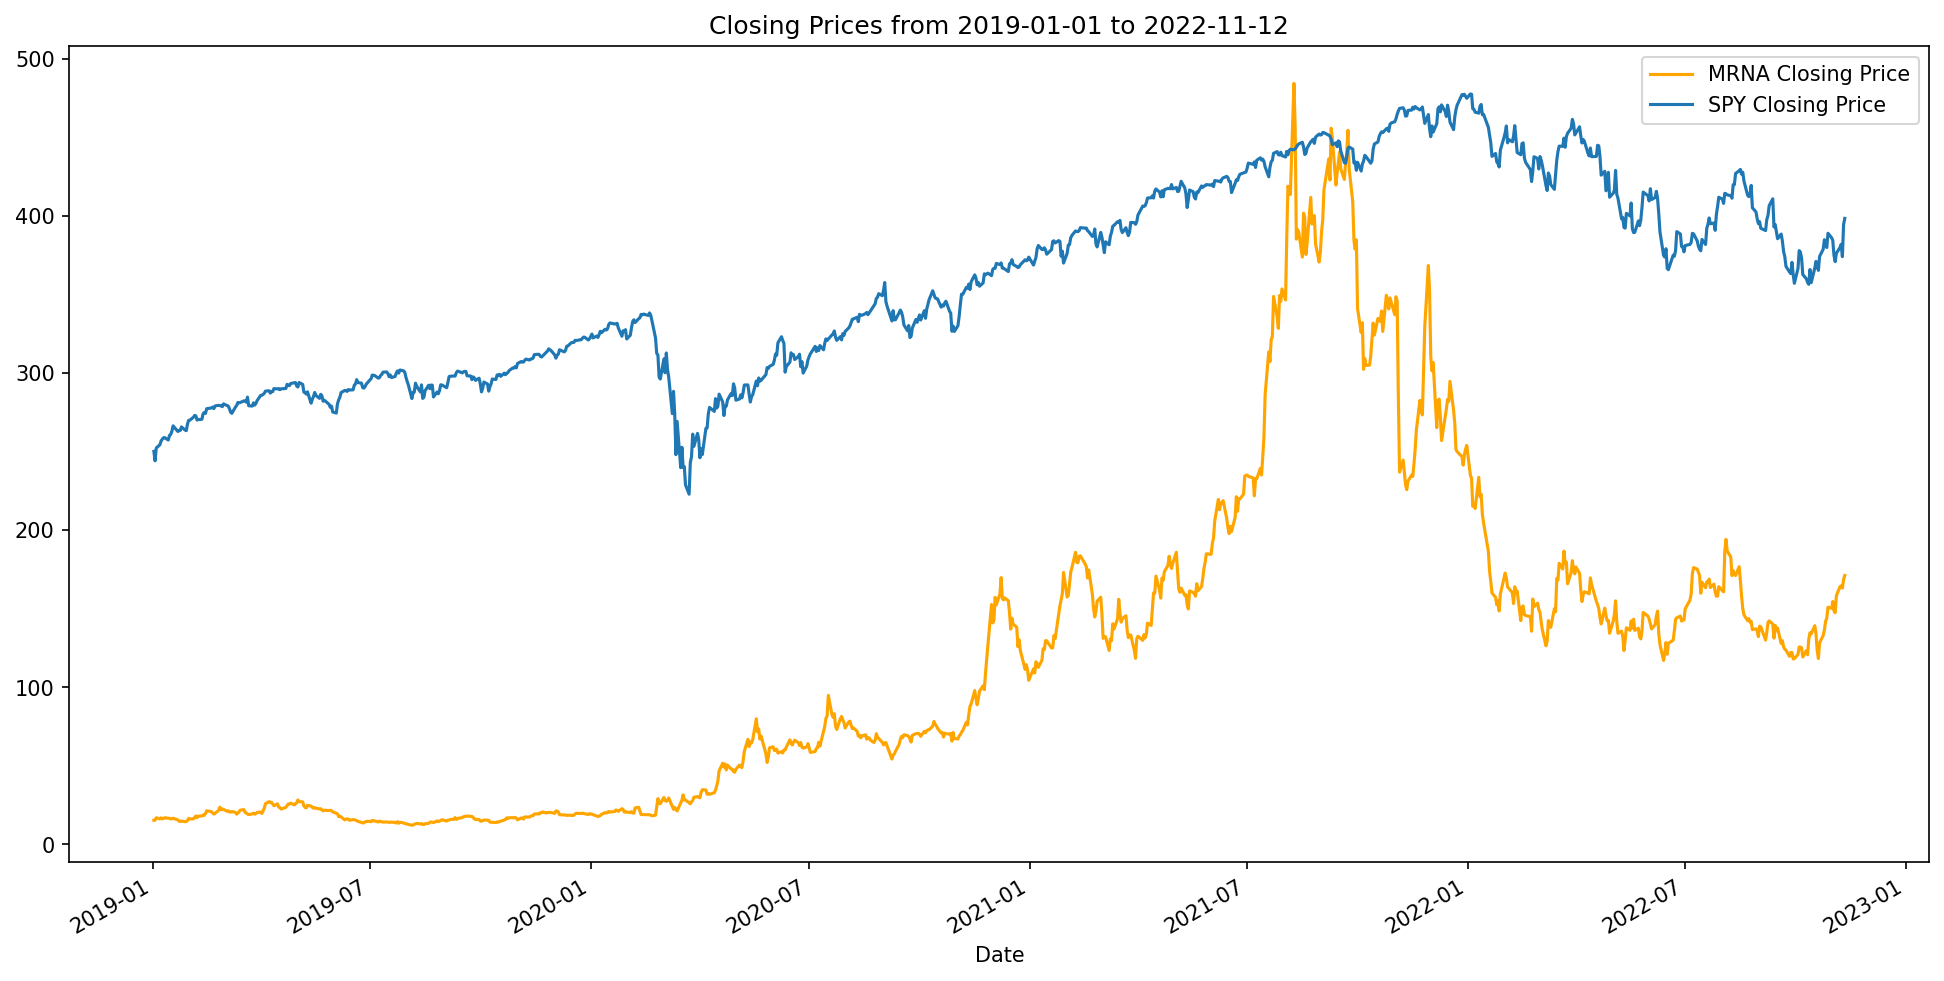

In [33]:
# Visualizing The Close Price of the stocks
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150) #dpi = resolution. default 100.
  
# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
stock_df_multiple['Close_MRNA'].plot(label='MRNA Closing Price', color='orange')
stock_df_multiple['Close_SPY'].plot(label='SPY Closing Price')
  
# adding title to the plot
plt.title('Closing Prices from {} to {}'.format(stock_start_date1, stock_end_date1))
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()


## 4. Let's complete the broken time series indexes and interpolate (impute missing values) the data (SEE SLIDES)

Source: https://www.section.io/engineering-education/missing-values-in-time-series/

Some time series models work with complete data, and therefore they require the missing data to be replaced with meaningful values before actual analysis. At a high level, missing values in time series are handled in two ways, either dropping them or replacing them. However, dropping missing values can be an inappropriate solution due to the time order of the data and the correlation between observations in adjacent periods.

Estimating a reasonable value such that the components of the series are not distorted is an excellent approach to dealing with missing values in time series. Imputation replaces missing values with values estimated from the same data or observed from the environment with the same conditions underlying the missing data.

Different ways to impute the missing values are as follows.
1. Mean or Median imputation
2. Last Observation Carried Forward (LOCF) - the missing value is imputed using the values before it in the time series
3. Next Observation Carried Backward (NOCB) - the missing values are imputed using an immediate value ahead of them
4. Linear interpolation - estimates unknown values by assuming linear relation within a range of data points
5. Spline interpolation - estimates values that minimize overall curvature, thus obtaining a smooth surface passing through the input points


In [34]:
stock_df_multiple

,Close_MRNA,Close_SPY
Date,,
2019-01-02,15.330000,250.179993
2019-01-03,15.500000,244.210007
2019-01-04,16.959999,252.389999
2019-01-07,16.270000,254.380005
2019-01-08,16.950001,256.769989
...,...,...
2022-11-07,164.039993,379.950012
2022-11-08,164.610001,382.000000
2022-11-09,163.210007,374.130005


In [35]:
# first, fill the misssing values with 'NaN'. Reindexing. 
stock_df_multiple_NaN = stock_df_multiple.reindex(pd.date_range('2019-01-01', stock_end_date1), fill_value= np.NaN)
stock_df_multiple_NaN

,Close_MRNA,Close_SPY
2019-01-01,NaN,NaN
2019-01-02,15.330000,250.179993
2019-01-03,15.500000,244.210007
2019-01-04,16.959999,252.389999
2019-01-05,NaN,NaN
...,...,...
2022-11-08,164.610001,382.000000
2022-11-09,163.210007,374.130005
2022-11-10,168.559998,394.690002
2022-11-11,171.199997,398.510010


In [36]:
# next, let's use ALL the different imputation techniques on MSFT and just the spline on SPY 

stock_df_multiple_imputed = stock_df_multiple_NaN.copy()
stock_df_multiple_imputed['MRNA_Spline']= stock_df_multiple_imputed['Close_MRNA'].interpolate(method='spline', order=1, limit=10, limit_direction='both')
stock_df_multiple_imputed['MRNA_Linear']= stock_df_multiple_imputed['Close_MRNA'].interpolate(method='linear', order=1, limit=10, limit_direction='both')
stock_df_multiple_imputed['MRNA_ffill']= stock_df_multiple_imputed['Close_MRNA'].fillna(method ='ffill')
stock_df_multiple_imputed['MRNA_bfill']= stock_df_multiple_imputed['Close_MRNA'].fillna(method ='bfill')
stock_df_multiple_imputed['MRNA_Mean']= stock_df_multiple_imputed['Close_MRNA'].fillna(stock_df_multiple_imputed['Close_MRNA'].mean())
stock_df_multiple_imputed['MRNA_Median']= stock_df_multiple_imputed['Close_MRNA'].fillna(stock_df_multiple_imputed['Close_MRNA'].median())
stock_df_multiple_imputed['SPY_Spline']= stock_df_multiple_imputed['Close_SPY'].interpolate(method='spline', order=1, limit=10, limit_direction='both')

stock_df_multiple_imputed.round(2)


,Close_MRNA,Close_SPY,MRNA_Spline,MRNA_Linear,MRNA_ffill,MRNA_bfill,MRNA_Mean,MRNA_Median,SPY_Spline
2019-01-01,NaN,NaN,16.99,15.33,NaN,15.33,118.98,114.39,255.54
2019-01-02,15.33,250.18,15.33,15.33,15.33,15.33,15.33,15.33,250.18
2019-01-03,15.50,244.21,15.50,15.50,15.50,15.50,15.50,15.50,244.21
2019-01-04,16.96,252.39,16.96,16.96,16.96,16.96,16.96,16.96,252.39
2019-01-05,NaN,NaN,16.64,16.73,16.96,16.27,118.98,114.39,253.17
...,...,...,...,...,...,...,...,...,...
2022-11-08,164.61,382.00,164.61,164.61,164.61,164.61,164.61,164.61,382.00
2022-11-09,163.21,374.13,163.21,163.21,163.21,163.21,163.21,163.21,374.13
2022-11-10,168.56,394.69,168.56,168.56,168.56,168.56,168.56,168.56,394.69
2022-11-11,171.20,398.51,171.20,171.20,171.20,171.20,171.20,171.20,398.51


In [44]:
# which imputation technique doesnt make sense and why?
# Mean and Median

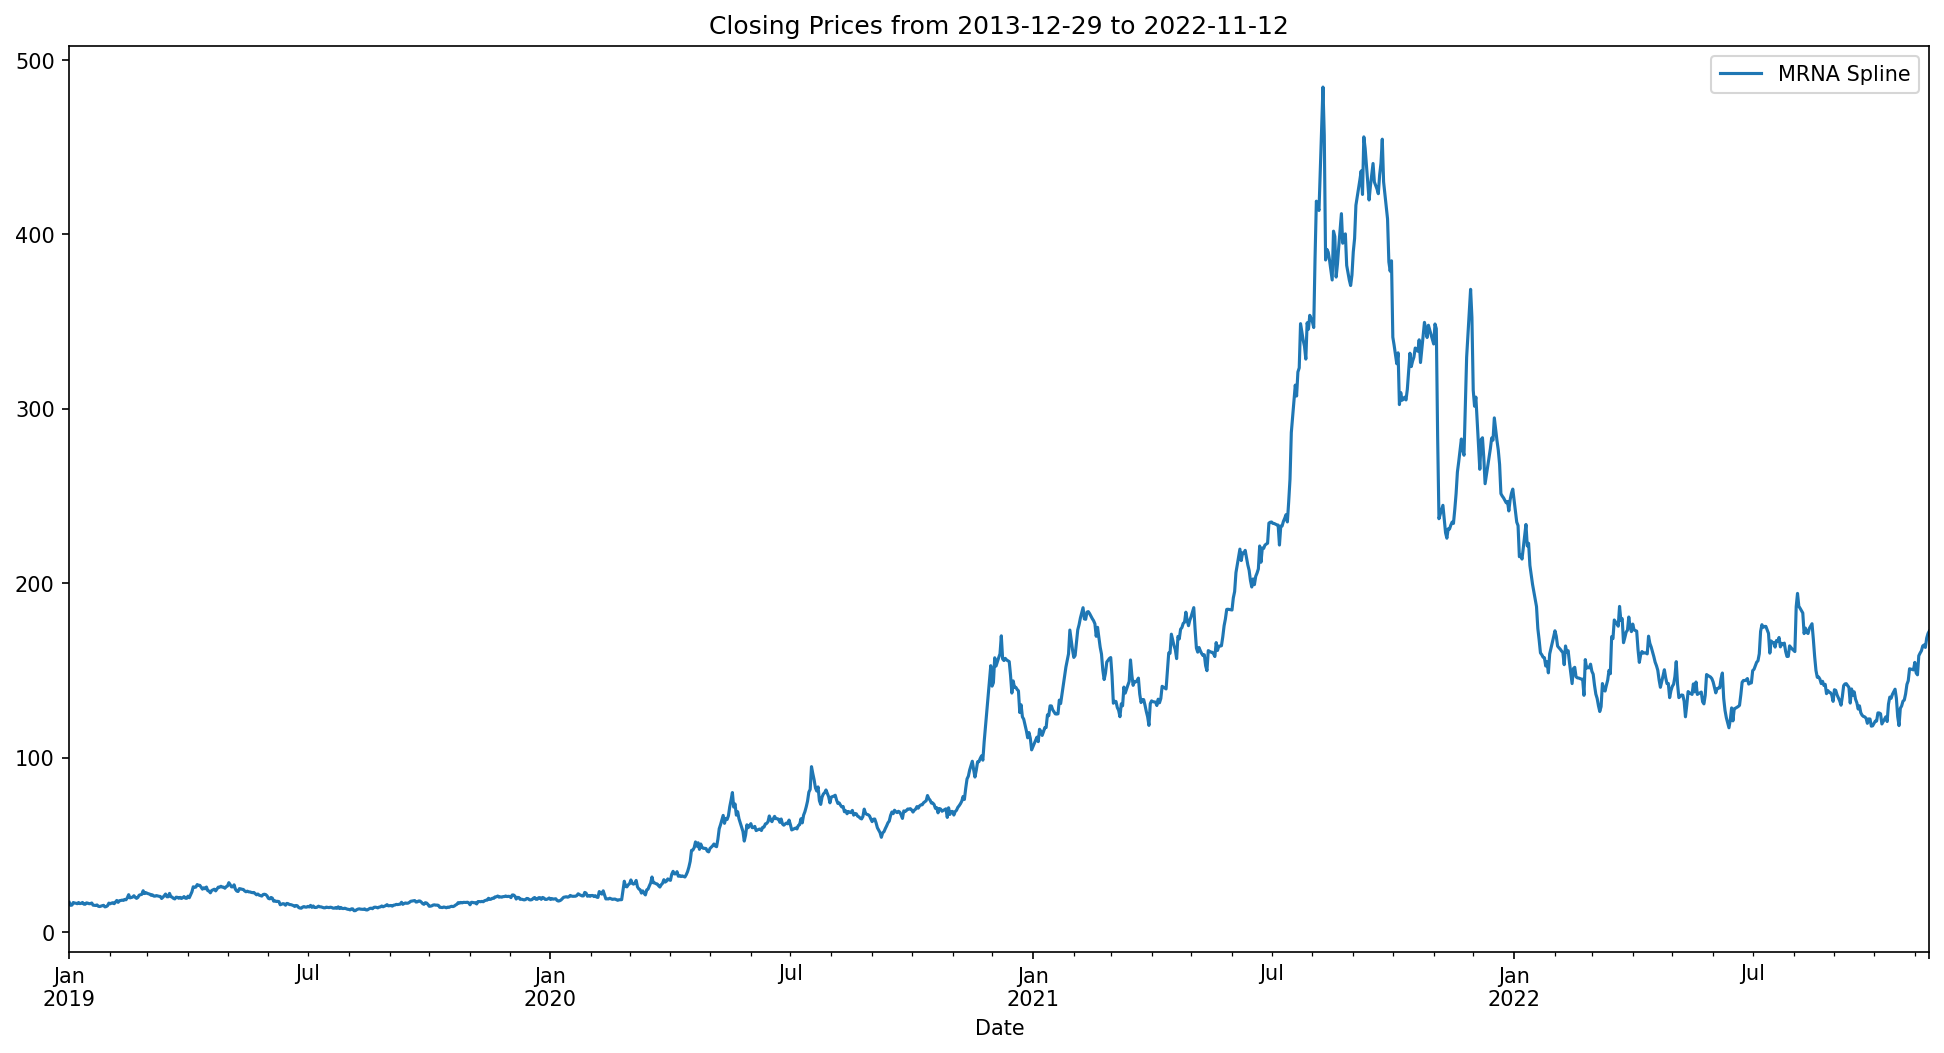

In [37]:
#Plot

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
#stock_df_multiple_imputed['MRNA_Median'].plot(label='MRNA Median', color='orange')
#stock_df_multiple_imputed['MRNA_Linear'].plot(label='MRNA Linear')
#stock_df_multiple_imputed['MRNA_bfill'].plot(label='MRNA Backfill')
stock_df_multiple_imputed['MRNA_Spline'].plot(label='MRNA Spline')

  
# adding title to the plot
plt.title('Closing Prices from {} to {}'.format(stock_start_date, stock_end_date1))
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()


In [46]:
# 5. Time Series Visualizations - Box and Whisker Plots - Outlier Detection
# Source: https://towardsdatascience.com/plotting-time-series-boxplots-5a21f2b76cfe

# ask students - why is outlier detection important?

Brief overview of Outlier Detection techniques can be found here: https://cnvrg.io/anomaly-detection-python/

1. Distribution-based techniques – Minimum Covariance Determinant, Elliptic Envelope
2. Depth-based technique – Isolation Forest
3. Clustering-based technique – Local Outlier Factor
4. Density-based technique – DBSCAN
5. Unified library for Outlier Detection – PyOD
6. Statistical techniques – Interquartile range
7. Visualization techniques – Box-plot

<AxesSubplot:ylabel='SPY_Spline'>

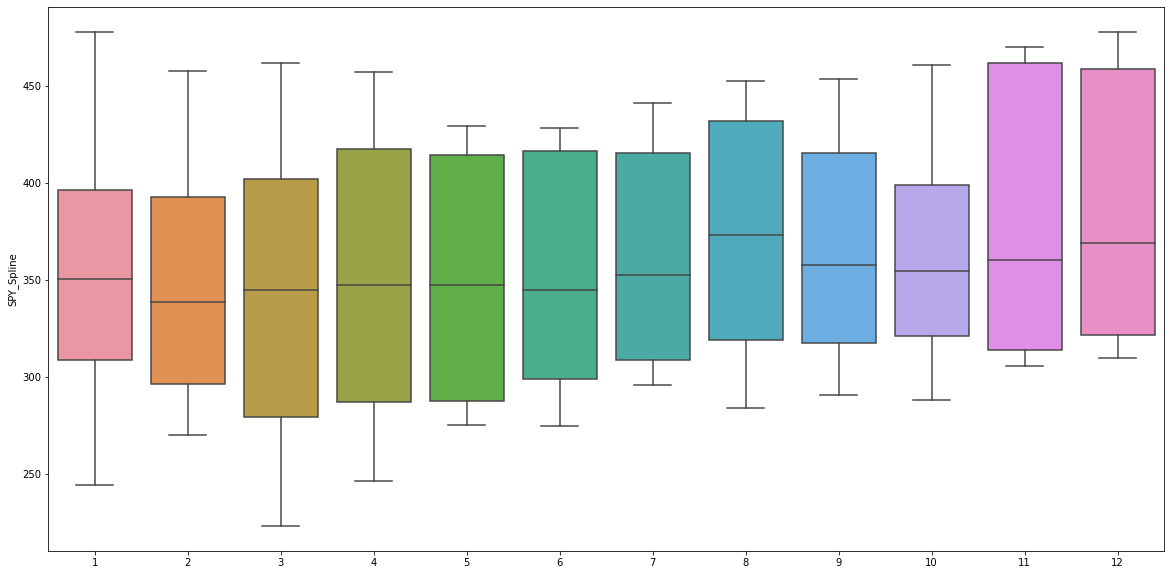

In [38]:
# price variation for each month

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = stock_df_multiple_imputed.index.month,
                y = stock_df_multiple_imputed['SPY_Spline'], 
                ax = ax)

### January is the month with the maximum stock price; And majority months are right skewed.

<AxesSubplot:ylabel='MRNA_Spline'>

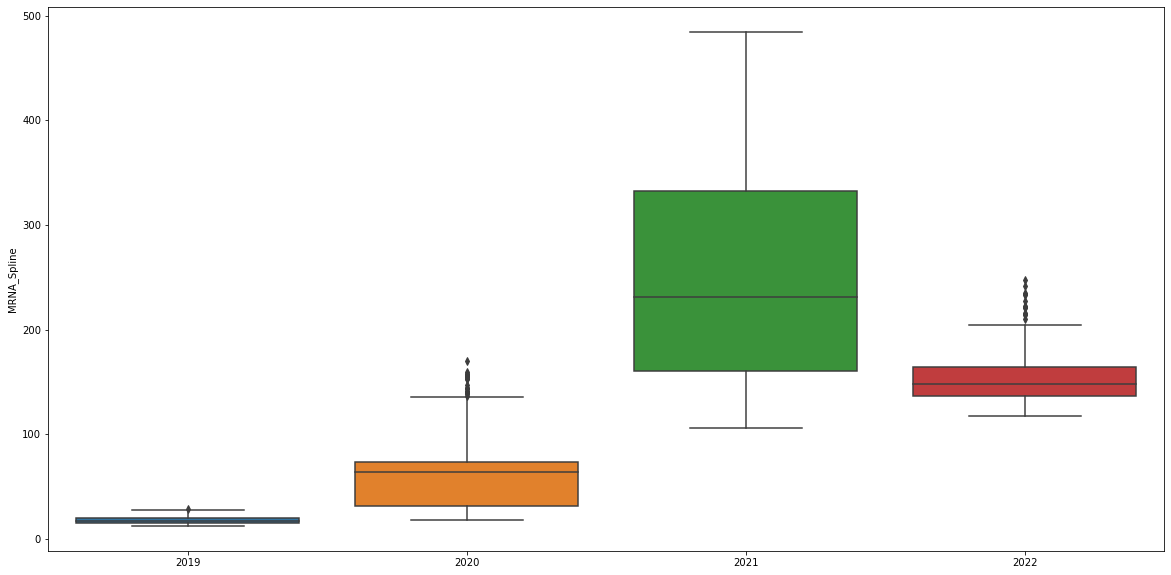

In [39]:
# price variation for each year
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = stock_df_multiple_imputed.index.year,
                y = stock_df_multiple_imputed['MRNA_Spline'], 
                ax = ax)

### There is a significant jump from 2020 to 2021.

In [49]:
# 6. Resampling 

Resampling involves changing the frequency of your time series observations. Two types of
resampling are:
1. Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.
2. Downsampling: Where you decrease the frequency of the samples, such as from days to months.

In both cases, data must be invented. In the case of upsampling, care may be needed in
determining how the fine-grained observations are calculated using interpolation. In the case of
downsampling, care may be needed in selecting the summary statistics used to calculate the
new aggregated values.

There are perhaps two main reasons why you may be interested in resampling your time
series data:
1. Problem Framing: Resampling may be required if your data is not available at the same frequency that you want to make predictions.
2. Feature Engineering: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

There is a lot of overlap between these two cases. For example, you may have daily data
and want to predict a monthly problem. You could use the daily data directly or you could
downsample it to monthly data and develop your model. A feature engineering perspective may
use observations and summaries of observations from both time scales and more in developing a
model. 

In [40]:
df_resample = stock_df_multiple_imputed.copy()

# extract only the spline variables
df_resample = df_resample[['MRNA_Spline', 'SPY_Spline']].round(2)
df_resample

,MRNA_Spline,SPY_Spline
2019-01-01,16.99,255.54
2019-01-02,15.33,250.18
2019-01-03,15.50,244.21
2019-01-04,16.96,252.39
2019-01-05,16.64,253.17
...,...,...
2022-11-08,164.61,382.00
2022-11-09,163.21,374.13
2022-11-10,168.56,394.69
2022-11-11,171.20,398.51


### Down Sampling 

In [41]:
# downsample the data from days to months to reduce variability in the data 
# observe the stock prices on a monthly basis
# MS: Start of the month
df_resample_months = df_resample.groupby(pd.Grouper(freq='MS')).median()
#df_resample_months = df_resample.resample('M').median() - #another way of resampling
df_resample_months

,MRNA_Spline,SPY_Spline
2019-01-01,16.040,260.980
2019-02-01,19.475,276.070
2019-03-01,20.350,280.420
2019-04-01,25.270,289.995
2019-05-01,23.120,285.630
2019-06-01,15.755,289.815
2019-07-01,14.120,298.800
2019-08-01,13.330,289.640
2019-09-01,16.550,298.065
2019-10-01,15.310,298.400


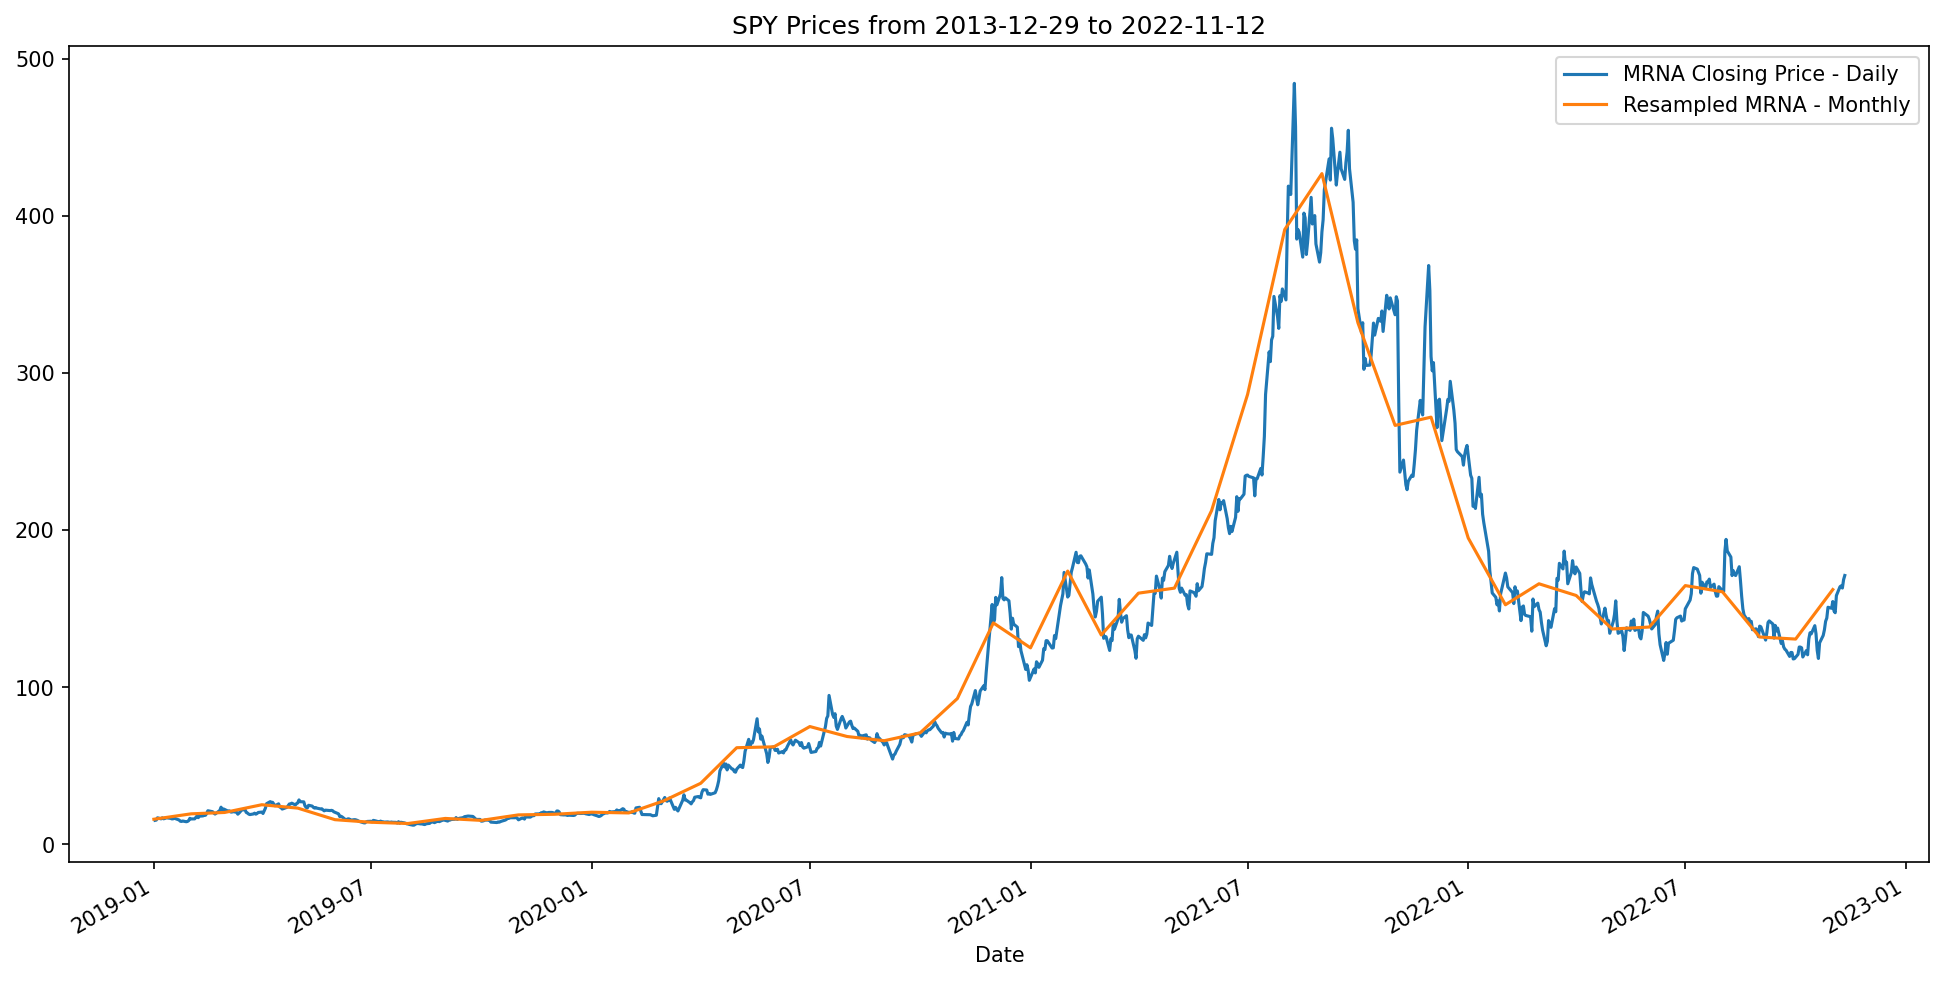

In [49]:
#Plot monthly data

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
#df_resample_months['MSFT_Spline'].plot(label='MSFT')
stock_df_multiple['Close_MRNA'].plot(label='MRNA Closing Price - Daily')
df_resample_months['MRNA_Spline'].plot(label='Resampled MRNA - Monthly')

# adding title to the plot
plt.title('SPY Prices from {} to {}'.format(stock_start_date, stock_end_date1))
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()

## 6. Autocorrelation or ACF plot


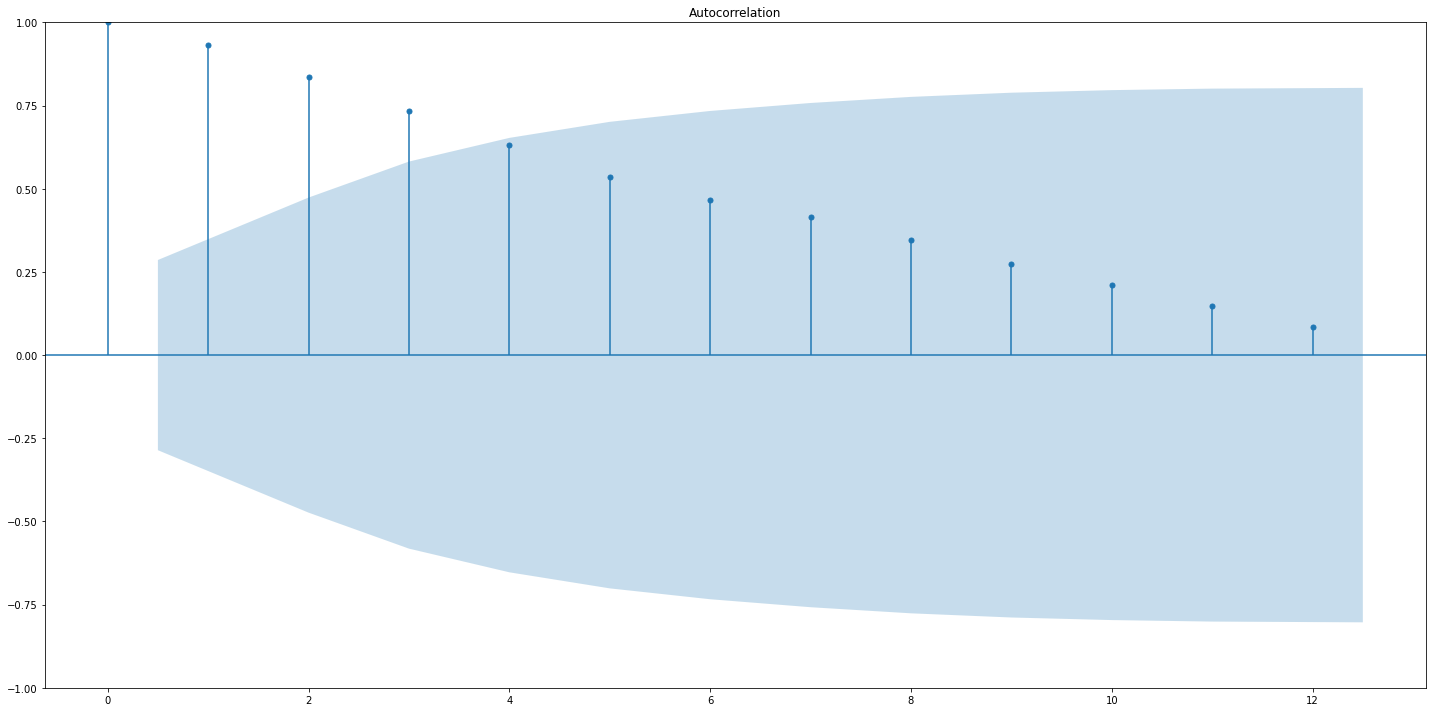

In [42]:
# Calculate the ACF (via statsmodel)
# Source: https://www.alpharithms.com/autocorrelation-time-series-python-432909/
# The below chart shows that any month compared to its lagged month
# only the ones not in the shadow is significant, the ones in the shadow(= in the confidence interval) is not significant
fig = plot_acf(df_resample_months['MRNA_Spline'], lags=12)  #lags = 30 means 30 month lag
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

###  Plot Interpretation: only the information until lag = 3 matters. Only prior 3 months will impact the next month.

In [55]:
# 7. Time Series Decomposition
# Source: https://stackoverflow.com/questions/20672236/time-series-decomposition-function-in-python

Time series decomposition is a process of deconstructing a time series into the following components:

1. Trend — general movement over time
2. Seasonal — behaviors captured in individual seasonal periods
3. Residual — everything not captured by trend and seasonal components


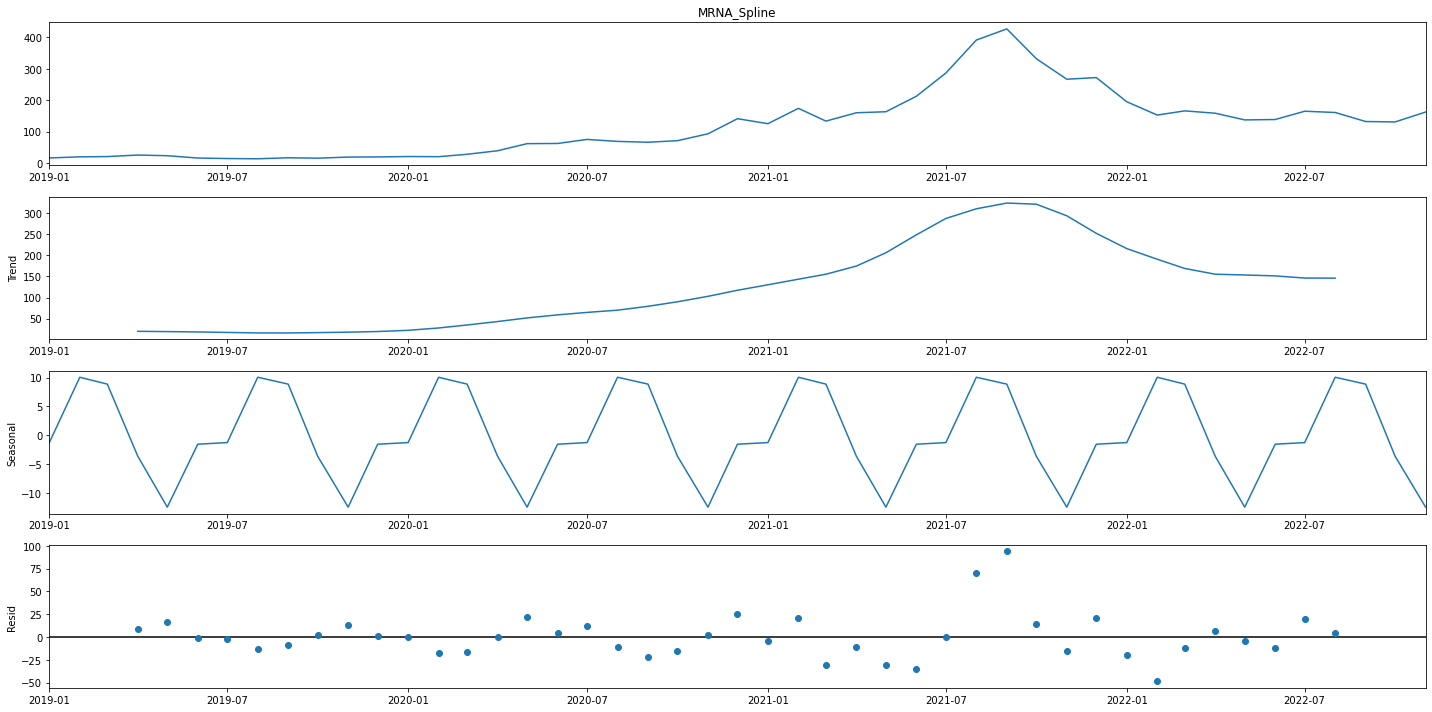

In [51]:
res = sm.tsa.seasonal_decompose(df_resample_months['MRNA_Spline'], period=6, extrapolate_trend=0)
fig = res.plot()
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [57]:
# We can extract the trend, seasonality, and error terms
# going forward let us only concentrate on one time series - SPY

In [52]:
mrna_df = df_resample_months[['MRNA_Spline']]

# extract the decomposed terms
mrna_df['trend'] = res.trend
mrna_df['seasonal'] = res.seasonal
mrna_df['error'] = res.resid
mrna_df
# trend + seasonal + error = SPY_Spline

,MRNA_Spline,trend,seasonal,error
2019-01-01,16.040,NaN,-1.272070,NaN
2019-02-01,19.475,NaN,10.079894,NaN
2019-03-01,20.350,NaN,8.882970,NaN
2019-04-01,25.270,19.841667,-3.648856,9.077189
2019-05-01,23.120,19.169583,-12.486296,16.436713
2019-06-01,15.755,18.340833,-1.555642,-1.030192
2019-07-01,14.120,17.194167,-1.272070,-1.802097
2019-08-01,13.330,16.004583,10.079894,-12.754478
2019-09-01,16.550,15.931250,8.882970,-8.264220
2019-10-01,15.310,16.750000,-3.648856,2.208856


<AxesSubplot:>

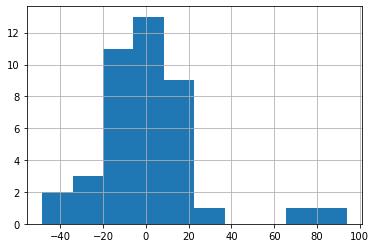

In [53]:
mrna_df['error'].hist()

In [60]:
# 8 . Time Series Viz - pairplot
# Source: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [144]:
df_resample_months

,MRNA_Spline,SPY_Spline
2019-01-01,16.040,260.980
2019-02-01,19.475,276.070
2019-03-01,20.350,280.420
2019-04-01,25.270,289.995
2019-05-01,23.120,285.630
2019-06-01,15.755,289.815
2019-07-01,14.120,298.800
2019-08-01,13.330,289.640
2019-09-01,16.550,298.065
2019-10-01,15.310,298.400


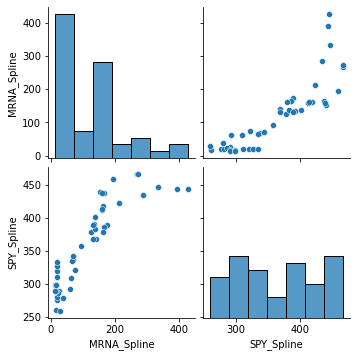

In [54]:
sns.pairplot(df_resample_months)

In [55]:
np.corrcoef(df_resample_months['MRNA_Spline'],df_resample_months['SPY_Spline'])

array([[1.        , 0.87242984],
       [0.87242984, 1.        ]])

In [61]:
df_resample_months

,MRNA_Spline,SPY_Spline
2019-01-01,16.040,260.980
2019-02-01,19.475,276.070
2019-03-01,20.350,280.420
2019-04-01,25.270,289.995
2019-05-01,23.120,285.630
2019-06-01,15.755,289.815
2019-07-01,14.120,298.800
2019-08-01,13.330,289.640
2019-09-01,16.550,298.065
2019-10-01,15.310,298.400


In [65]:
# spurious correlation - https://www.statology.org/spurious-correlation-examples/

In [56]:
differenced = df_resample_months.diff()  # take the trend and seasonality out, to make the data stationary

In [57]:
differenced  # now the value in the below data frame is the difference between two day's stock price after taking out trend and seasonality

,MRNA_Spline,SPY_Spline
2019-01-01,NaN,NaN
2019-02-01,3.435,15.090
2019-03-01,0.875,4.350
2019-04-01,4.920,9.575
2019-05-01,-2.150,-4.365
2019-06-01,-7.365,4.185
2019-07-01,-1.635,8.985
2019-08-01,-0.790,-9.160
2019-09-01,3.220,8.425
2019-10-01,-1.240,0.335


<AxesSubplot:>

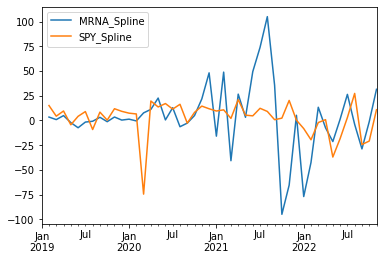

In [58]:
differenced.plot()     # the mean is around 0, the data is now stationary.

In [59]:
np.corrcoef(differenced['MRNA_Spline'].dropna(),differenced['SPY_Spline'].dropna())   #this correlation "0.20325" number can be trusted

array([[1.       , 0.2039531],
       [0.2039531, 1.       ]])

## Split data into train and test sets

In [70]:
# let us select just one series - SPY

In [60]:
mrna = mrna_df[['MRNA_Spline']]
mrna.shape

(47, 1)

In [61]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(mrna, test_size=12, random_state=25, shuffle = False)
#shuffle = False is very important to ensure the order of the data, time series data is ordered data

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 35
No. of testing examples: 12


In [62]:
train_data

,MRNA_Spline
2019-01-01,16.040
2019-02-01,19.475
2019-03-01,20.350
2019-04-01,25.270
2019-05-01,23.120
2019-06-01,15.755
2019-07-01,14.120
2019-08-01,13.330
2019-09-01,16.550
2019-10-01,15.310


In [173]:
test_data

,MRNA_Spline
2021-12-01,271.990
2022-01-01,195.050
2022-02-01,152.560
2022-03-01,165.920
2022-04-01,158.465
2022-05-01,137.140
2022-06-01,138.385
2022-07-01,164.770
2022-08-01,160.810
2022-09-01,132.040


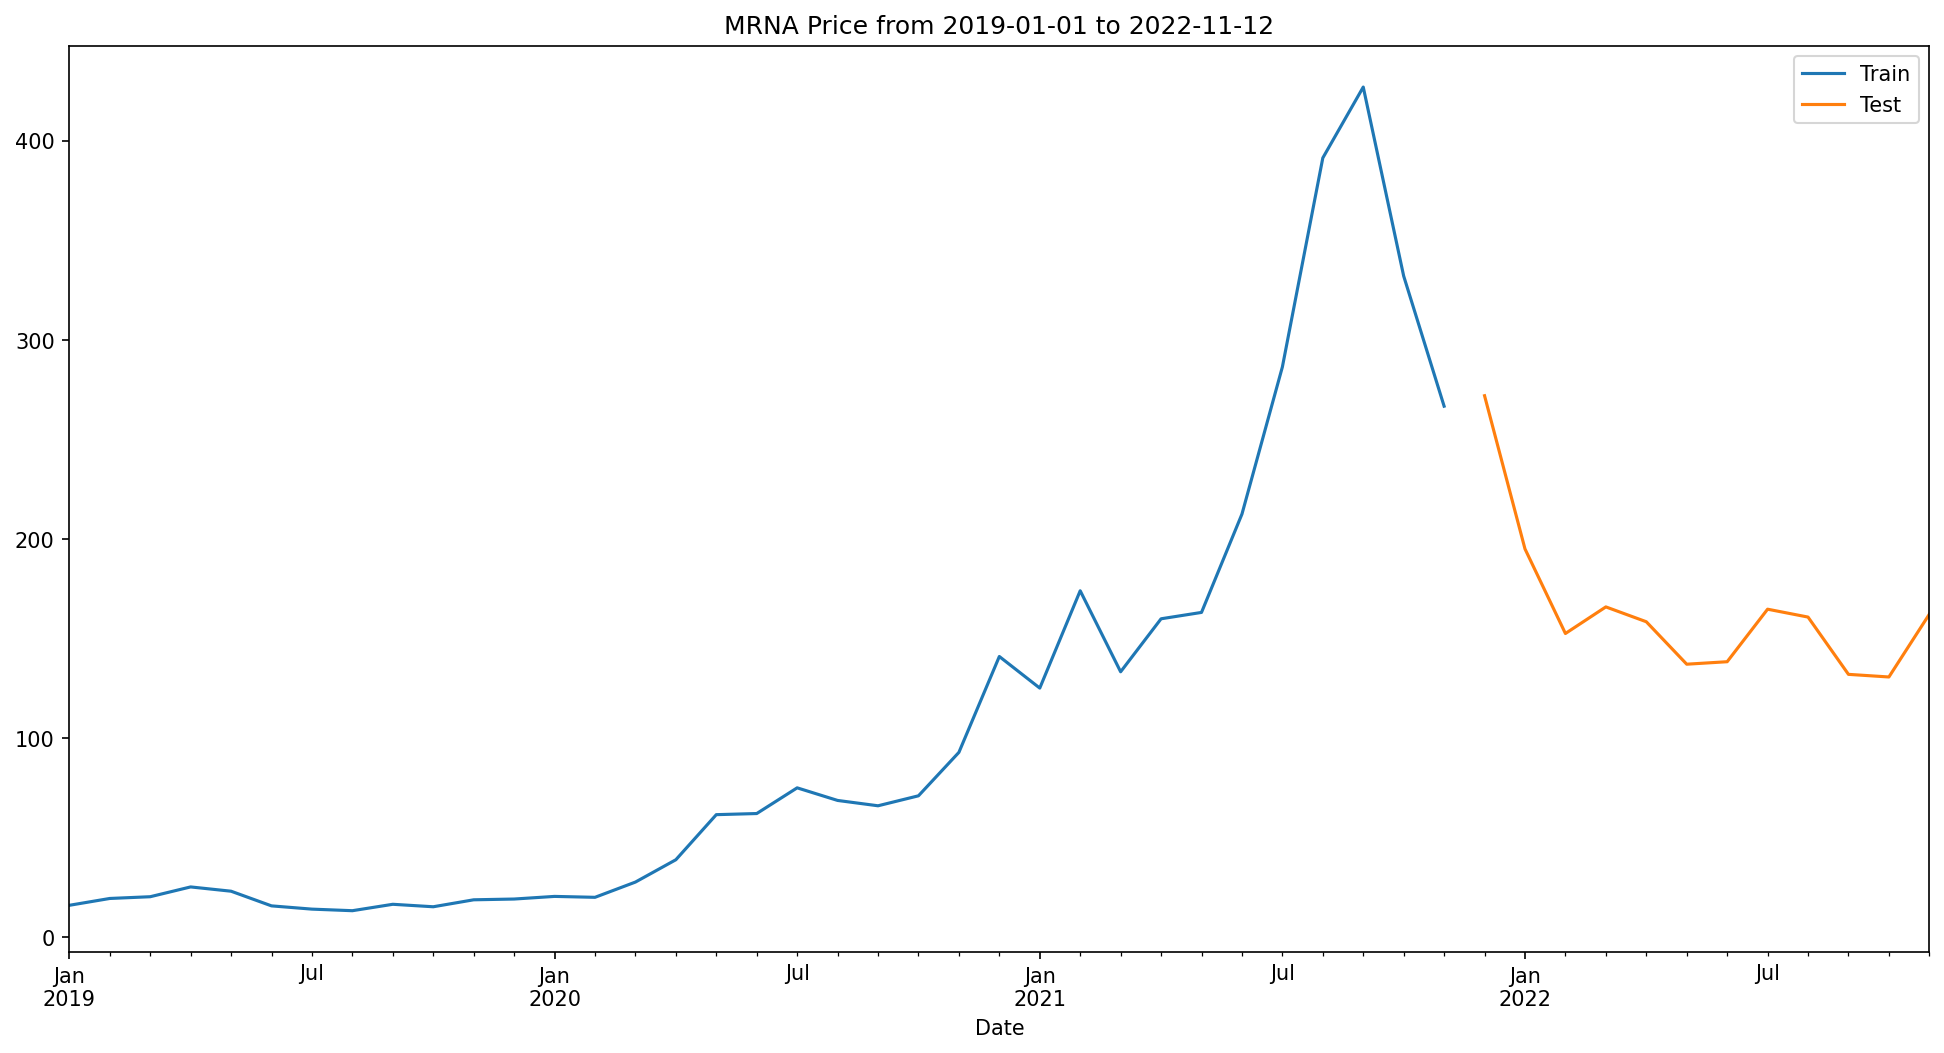

In [63]:
#Plot train and test data

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
train_data['MRNA_Spline'].plot(label='Train')
test_data['MRNA_Spline'].plot(label='Test')

  
# adding title to the plot
plt.title('MRNA Price from {} to {}'.format(stock_start_date1, stock_end_date1))
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()


## Fitting Models - Exponential Smoothing Models

### ETS - Error, Trend, Seasonailty

Exponential smoothing was proposed in the late 1950s, and has motivated some of the most successful forecasting methods. Exponential smoothing is a time series forecasting method for univariate data. Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight.

The weights are controlled by the smoothing parameter which is known as 'alpha'. alpha value can be between 0 to 1:

1. (alpha)=0: Means that forecast for future value is the average of historical data.
2. (alpha)=1: Means that forecast for all future value is the value of the last observation   

Source: 
1. https://analyticsindiamag.com/hands-on-guide-to-time-series-analysis-using-simple-exponential-smoothing-in-python/#:~:text=Simple%20Exponential%20Smoothing%20(SES)%20is,statsmodel%20using%20pip%20install%20statsmodel.&text=Simple%20Exponential%20Smoothing%20is%20defined,where%20we%20will%20import%20it.
2. https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/

#### Simple Exponential Smoothing

The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES)13. This method is suitable for forecasting data with no clear trend or seasonal pattern. 

For creating a prediction model using SES we should have an (alpha) value which can be hyper parameter tuned. Here we will create three instances in which we will take three different (alpha) values as:

1. (alpha) = 0.2
2. (alpha) = 0.5
3. (alpha) value automatically optimized by statsmodel which is the recommended one.

We will pass the data into Simple Exponential Smoothing and fit the data with different values of the Smoothing Level.

In [64]:
#First Instance
ins1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(12).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(12).rename('alpha=0.8')

#Third Instance
ins3 = SimpleExpSmoothing(train_data).fit()
ins_cast3 = ins3.forecast(12).rename('alpha=%s'%ins3.model.params['smoothing_level'])


In [65]:
ins_cast3

2021-12-01    266.735001
2022-01-01    266.735001
2022-02-01    266.735001
2022-03-01    266.735001
2022-04-01    266.735001
2022-05-01    266.735001
2022-06-01    266.735001
2022-07-01    266.735001
2022-08-01    266.735001
2022-09-01    266.735001
2022-10-01    266.735001
2022-11-01    266.735001
Freq: MS, Name: alpha=0.9999999850988145, dtype: float64

In [186]:
test_data


,MRNA_Spline
2021-12-01,271.990
2022-01-01,195.050
2022-02-01,152.560
2022-03-01,165.920
2022-04-01,158.465
2022-05-01,137.140
2022-06-01,138.385
2022-07-01,164.770
2022-08-01,160.810
2022-09-01,132.040


In [187]:
train_data

,MRNA_Spline
2019-01-01,16.040
2019-02-01,19.475
2019-03-01,20.350
2019-04-01,25.270
2019-05-01,23.120
2019-06-01,15.755
2019-07-01,14.120
2019-08-01,13.330
2019-09-01,16.550
2019-10-01,15.310


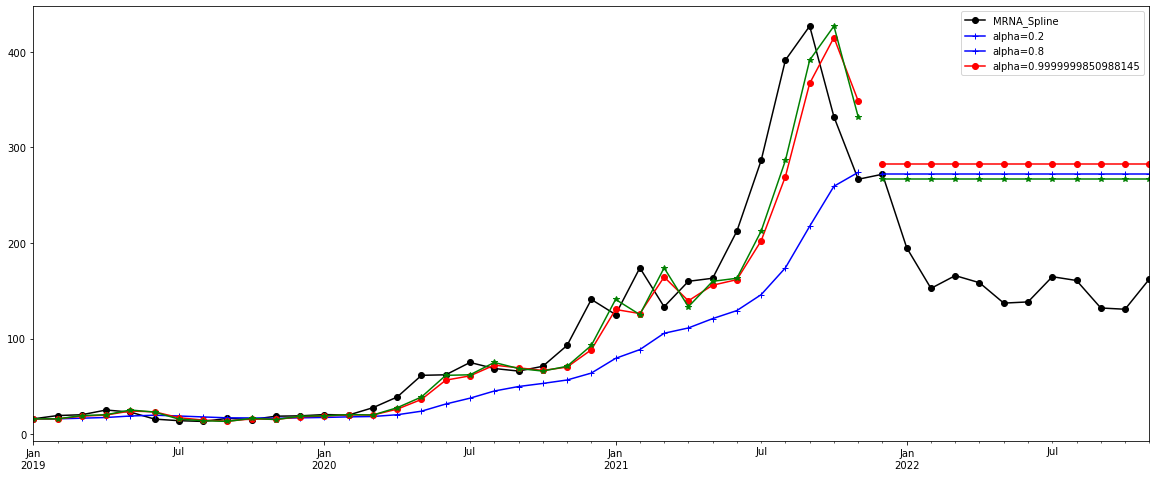

In [66]:
#After creating model we will visualize the plot
ax = mrna.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()

In [80]:
'''
In terms of forecasting, simple exponential smoothing generates a constant set of values. 
All forecasts equal the last value of the level component. 
Consequently, these forecasts are appropriate only when your time series data have no trend or seasonality.
'''

'\nIn terms of forecasting, simple exponential smoothing generates a constant set of values. \nAll forecasts equal the last value of the level component. \nConsequently, these forecasts are appropriate only when your time series data have no trend or seasonality.\n'

#### Double Exponential Smoothing 

This is the extended version of simple exponential smoothing to allow the forecasting of data with a trend. This method has two smoothing equations and hence two parameters, alpha and beta, (one for the level and one for the trend). 

In [81]:
# Double ETS
# Let us fit the data on Double ES, on both Additive and Multiplicative Trend

In [67]:
double_ets_add = ExponentialSmoothing(train_data, trend = 'add').fit()
double_ets_mul = ExponentialSmoothing(train_data, trend = 'mul').fit()

double_ets_add_pred = double_ets_add.forecast(12)
double_ets_mul_pred = double_ets_mul.forecast(12)


C:\Users\frede\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


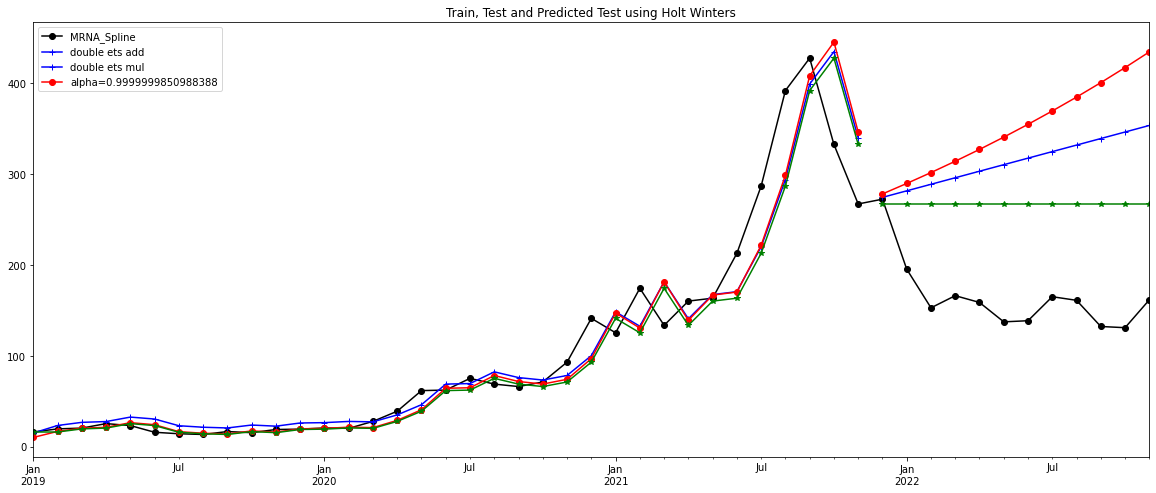

In [181]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
ax = mrna.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
double_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'double ets add')
double_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
double_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'double ets mul')
double_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()



#### Triple Exponential Smoothing 

This is the extended version of simple exponential smoothing to allow the forecasting of data with a trend and seasonality. This method has three smoothing equations and hence three parameters - alpha, beta, and gamma. (one each for the level, trend, and seasonality).

In [68]:
# triple ETS - Holt Winter's Seasonal Method
triple_ets_add = ExponentialSmoothing(train_data, trend = 'add', seasonal = 'add', seasonal_periods=12).fit()
triple_ets_mul = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'mul', seasonal_periods=12).fit()

triple_ets_add_pred = triple_ets_add.forecast(12)
triple_ets_mul_pred = triple_ets_mul.forecast(12)


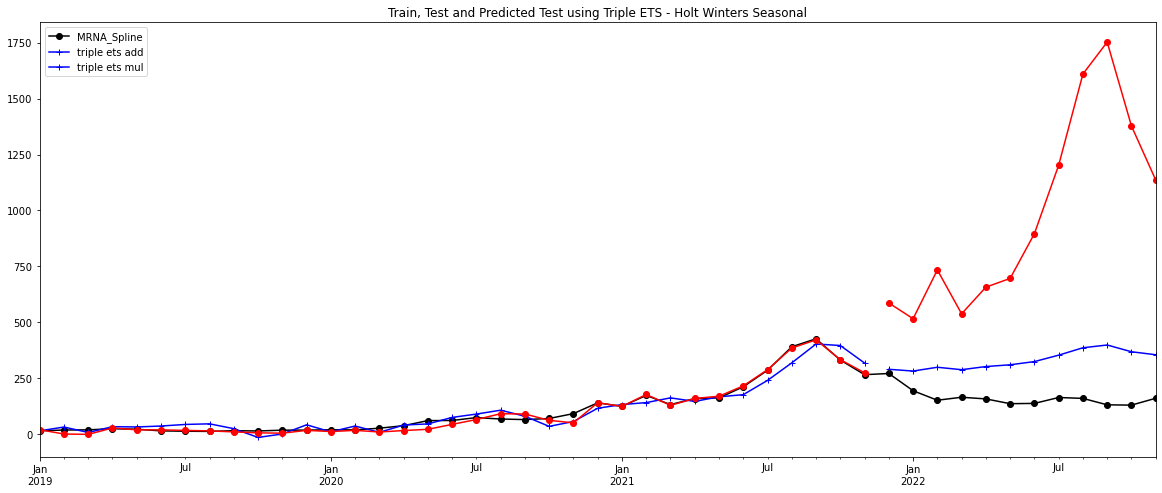

In [194]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
ax = mrna.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
triple_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'triple ets add')
triple_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
triple_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'triple ets mul')
triple_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
#ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
#ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Triple ETS - Holt Winters Seasonal')
plt.show()

## Visualize Forecast Errors

Source: https://machinelearningmastery.com/visualize-time-series-residual-forecast-errors-with-python/

In [86]:
# Residual Plots / Residual Diagnostics. What are residuals?

In [88]:
residuals = [test_data.values.flatten()[i]-ins_cast3.values.flatten()[i] for i in range(len(test_data))]
residuals_simple = pd.DataFrame(residuals)

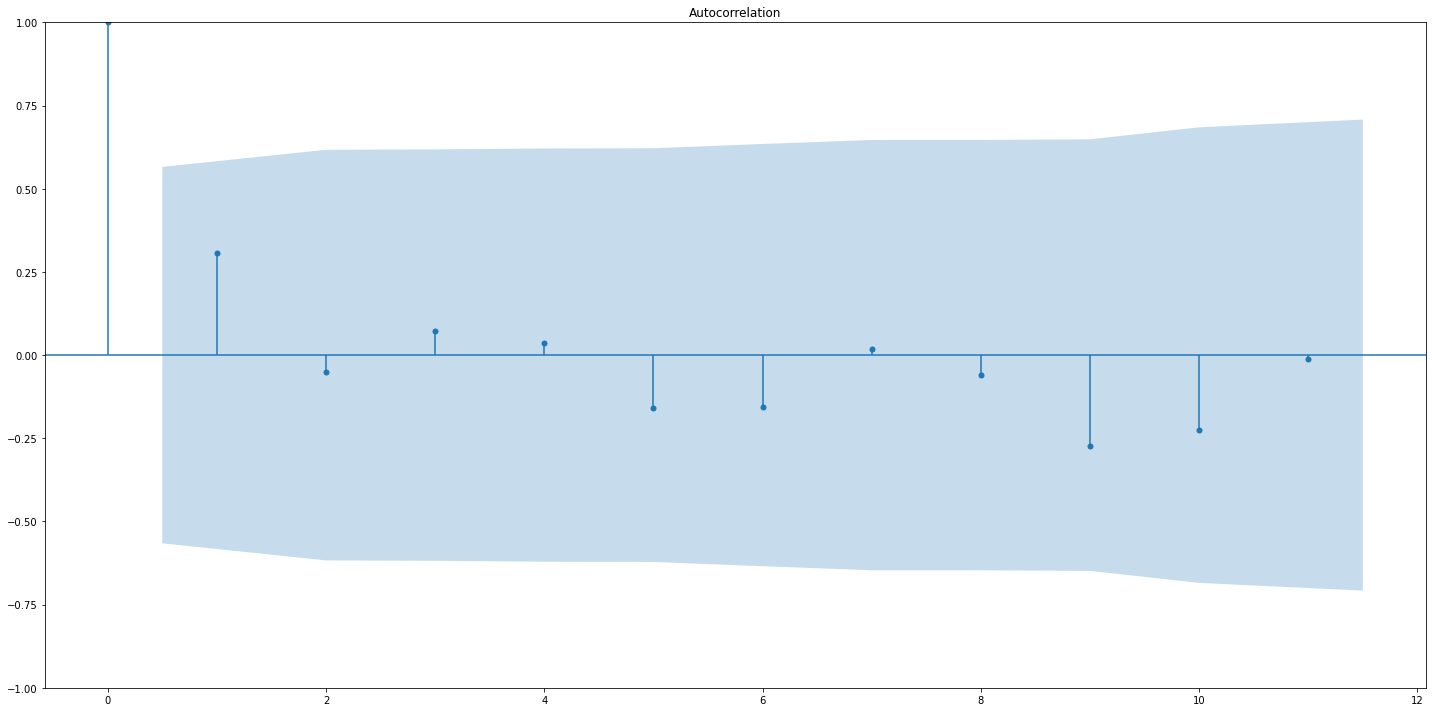

In [89]:
fig = plot_acf(residuals_simple)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [69]:
#calculate residuals
residuals = [test_data.values.flatten()[i]-triple_ets_add_pred.values.flatten()[i] for i in range(len(test_data))]
residuals = pd.DataFrame(residuals)

In [70]:
residuals

,0
0,-19.705393
1,-89.988368
2,-150.165875
3,-126.062545
4,-148.185601
5,-177.788382
6,-190.868839
7,-192.807935
8,-229.667994
9,-270.591451


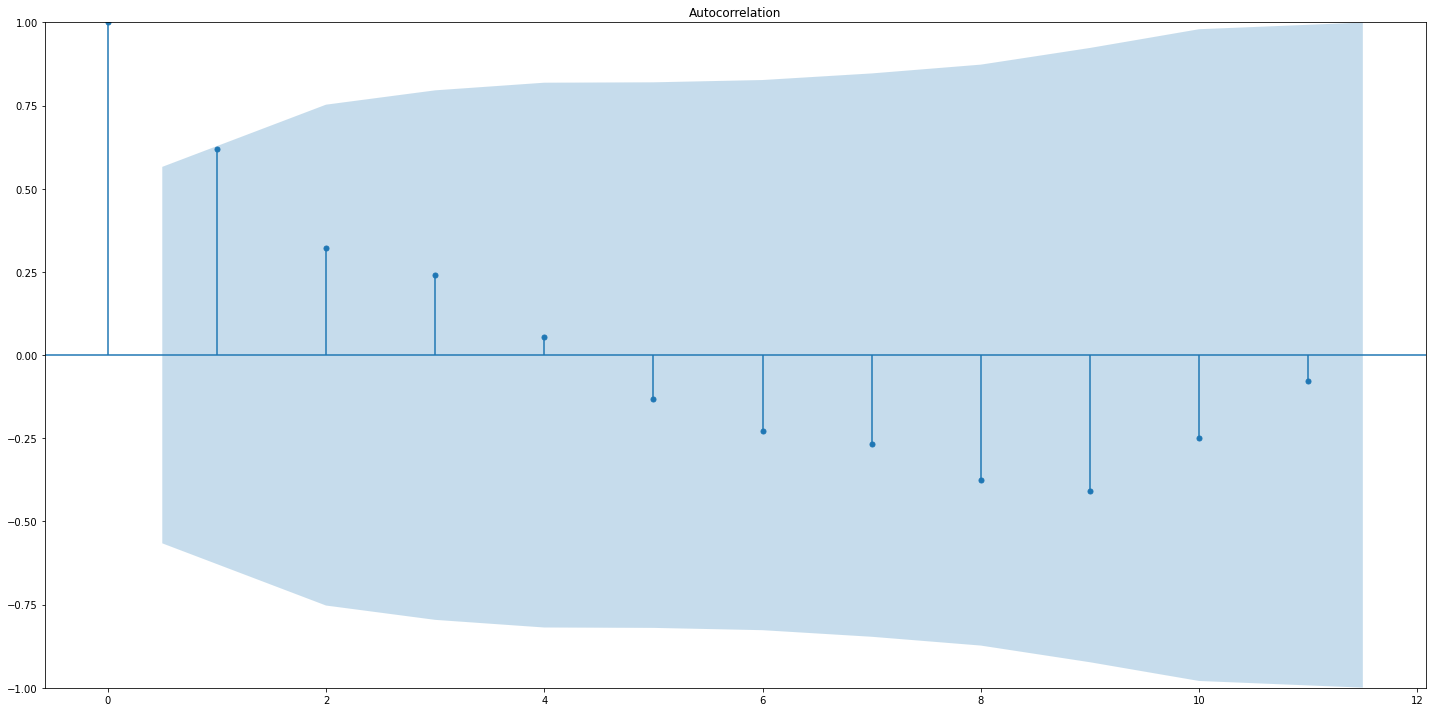

In [71]:

fig = plot_acf(residuals)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

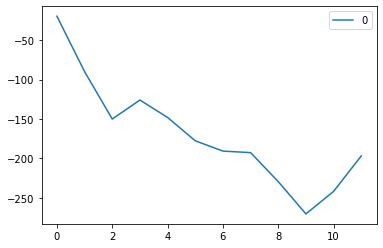

In [72]:
# plot residuals
residuals.plot()
plt.show()

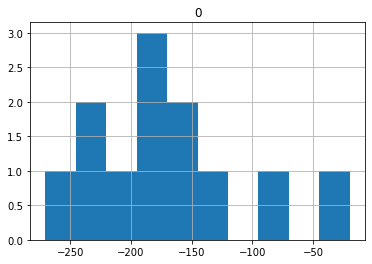

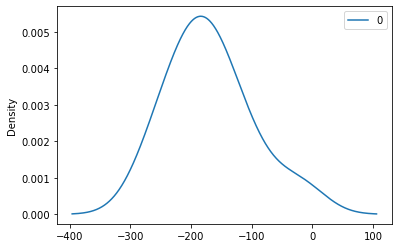

In [73]:
# histogram plot
residuals.hist()
plt.show()
# density plot
residuals.plot(kind='kde')
plt.show()

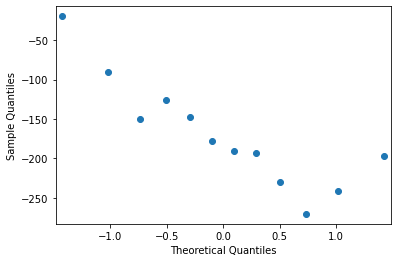

In [74]:
qqplot(residuals)
plt.show()

### Metrics - model evaluation

1. Root Mean Squared Error (RMSE) represents the sample standard deviation of the differences between predicted values and observed values. These individual differences are called residuals when the calculations are performed over the data sample that was used for estimation, and are called prediction errors when computed out-of-sample. This is a great measurement to use when comparing models as it shows how many deviations from the mean the forecasted values fall.
2. Mean Absolute Error (MAE) takes the sum of the absolute difference from actual to forecast and averages them. It is less sensitive to the occasional very large error because it does not square the errors in the calculation.
3. Mean Absolute Percentage Error (MAPE) is also often useful for purposes of reporting, because it is expressed in generic percentage terms it will make sense even to someone who has no idea what constitutes a "big" error in terms of dollars spent or widgets sold.

In [84]:
#define metrics dataframe which will be used below for 
metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])

                                 
def metrics_cal(actuals, predictions, model):
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
    wmape = sum(np.abs(actuals - predictions))/sum(actuals)
    df = pd.DataFrame({'Model': model,
                       'MSE': mse,
                       'RMSE': rmse,
                       'MAE': mae, 
                       'MAPE': mape,
                       'WMAPE' : wmape}, index=[0])
    dataframe = metrics_dataframe.append(df)
    return dataframe

In [85]:
ins_cast1.shape
ins_cast2.shape

(12,)

In [86]:
#get all the metrics
metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast1.values.flatten(), 
                                'Simple 0.2')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast2.values.flatten(), 
                                'Simple 0.8')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast3.values.flatten(), 
                                'Simple 1')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                double_ets_add_pred.values.flatten(), 
                                'Double Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                double_ets_mul_pred.values.flatten(), 
                                'Double Mul')


metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                triple_ets_add_pred.values.flatten(), 
                                'Triple Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                triple_ets_mul_pred.values.flatten(), 
                                'Triple Mul')


In [87]:
metrics_dataframe

,Model,RMSE,MAE,MAPE,MSE,WMAPE
0,Simple 0.2,114.452813,108.352107,72.346734,13099.446478,0.659981
0,Simple 0.8,124.534639,118.952129,79.050221,15508.876396,0.724547
0,Simple 1,108.985810,103.436251,69.006061,11877.906760,0.630038
0,Double Add,162.198945,151.820057,101.642648,26308.497685,0.924748
0,Double Mul,162.822489,152.036355,101.845934,26511.162943,0.926065
0,Triple Add,181.977455,169.559821,113.342012,33115.794084,1.032802
0,Triple Mul,914.443267,807.494755,536.728684,836206.487711,4.918513


In [209]:
mrna.tail(12).mean()


MRNA_Spline    164.098333
dtype: float64

In [98]:
triple_ets_add_pred.values.flatten()

array([471.56290803, 476.43132918, 480.89713754, 468.5311348 ,
       486.57830234, 491.66553429, 499.85740707, 509.87659047,
       515.7464574 , 517.88730519, 521.53581466, 531.9566796 ])

In [210]:
# Create a data frame with all the predictions along with the test data
test_pred_df = test_data.copy()

# Add all predictions 
test_pred_df = test_pred_df.assign(SimpleExp_1_pred = ins_cast3.values.flatten(),
                                   Double_add_pred = double_ets_add_pred.values.flatten(),
                                   Triple_add_pred = triple_ets_add_pred.values.flatten())

test_pred_df

,MRNA_Spline,SimpleExp_1_pred,Double_add_pred,Triple_add_pred
2021-12-01,271.990,266.735001,273.986225,290.716086
2022-01-01,195.050,266.735001,281.171447,282.947609
2022-02-01,152.560,266.735001,288.356670,299.831195
2022-03-01,165.920,266.735001,295.541892,288.969823
2022-04-01,158.465,266.735001,302.727115,302.979964
2022-05-01,137.140,266.735001,309.912337,310.900624
2022-06-01,138.385,266.735001,317.097560,325.162295
2022-07-01,164.770,266.735001,324.282782,353.848781
2022-08-01,160.810,266.735001,331.468005,386.938720
2022-09-01,132.040,266.735001,338.653227,399.224301


In [211]:
# Create an average prediction from the three and check it's metrics
test_pred_df['Average_Predictions'] = (test_pred_df['SimpleExp_1_pred']+test_pred_df['Double_add_pred']+test_pred_df['Triple_add_pred'])/3
test_pred_df


,MRNA_Spline,SimpleExp_1_pred,Double_add_pred,Triple_add_pred,Average_Predictions
2021-12-01,271.990,266.735001,273.986225,290.716086,277.145771
2022-01-01,195.050,266.735001,281.171447,282.947609,276.951352
2022-02-01,152.560,266.735001,288.356670,299.831195,284.974289
2022-03-01,165.920,266.735001,295.541892,288.969823,283.748905
2022-04-01,158.465,266.735001,302.727115,302.979964,290.814027
2022-05-01,137.140,266.735001,309.912337,310.900624,295.849321
2022-06-01,138.385,266.735001,317.097560,325.162295,302.998285
2022-07-01,164.770,266.735001,324.282782,353.848781,314.955521
2022-08-01,160.810,266.735001,331.468005,386.938720,328.380575
2022-09-01,132.040,266.735001,338.653227,399.224301,334.870843


In [212]:
metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                test_pred_df['Average_Predictions'].values.flatten(), 
                                'Average')

metrics_dataframe

,Model,RMSE,MAE,MAPE
0,Simple 0.2,114.525960,108.427717,72.425719
0,Simple 0.8,124.608758,119.028219,79.132597
0,Simple 1,109.059210,103.512501,69.083763
0,Double Add,159.568009,149.406615,100.081671
0,Double Mul,201.767258,186.484288,125.062961
0,Triple Add,178.828916,166.429805,111.341012
0,Triple Mul,918.435227,811.335788,539.432283
0,Average,148.656416,139.491029,93.394812


In [103]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE
0,Simple 0.2,36.298422,31.806322,7.970325
0,Simple 0.5,58.999720,50.048494,12.751081
0,Simple 1,62.561334,53.620833,13.637850
0,Average,85.989836,74.037009,18.809466
0,Triple Add,98.212785,83.926383,21.337351
0,Double Add,97.466304,84.563811,21.453198
0,Double Mul,104.316332,90.423131,22.939918
0,Triple Mul,118.408799,101.566521,25.791069


In [104]:
# write data to csv and excel
#test_pred_df.to_csv('/Users/../Downloads/test.csv', index = True, header=True)
#test_pred_df.to_excel('/Users/s../Downloads/test.xlsx', index = True, header=True)